First we create a large, sparse, positive definite matrix that arises in the solution of differntial equations.

In [1]:
using SparseArrays
n = 100
D2 = spdiagm(0=>fill(2,n-1),1=>-ones(n-2),-1=>-ones(n-2))
I = spdiagm(0=>ones(n-1))
A = kron(I,D2) + kron(D2,I);

Now we solve a linear system with a random right-hand side, without preconditioner.

In [2]:
using IterativeSolvers
b = rand(size(A,1))
cg(A,b,maxiter=4,tol=1e-10,log=true);  # make timing more accurate
time_plain = @elapsed x,hist1 = cg(A,b,maxiter=400,tol=1e-10,log=true)

0.027717689

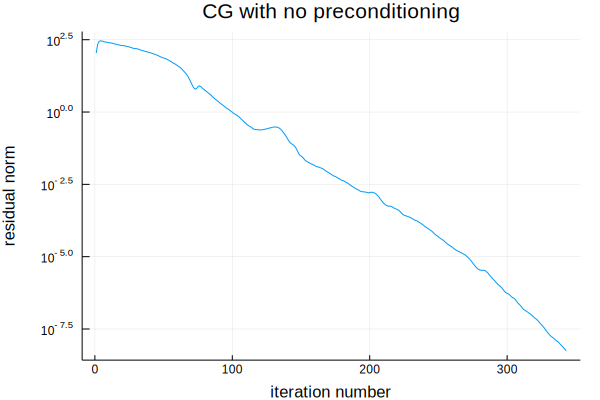

In [3]:
using Plots
plot(hist1[:resnorm],label="", 
    title="CG with no preconditioning",
    xaxis=("iteration number"), yaxis=(:log10,"residual norm") )

For an SPD matrix we can use an incomplete Cholesky factorization. (It uses a lower triangular $\mathbf{L}=\mathbf{R}^T$ rather than an upper triangular $\mathbf{R}$.) 

In [4]:
using Preconditioners,LinearAlgebra
P = CholeskyPreconditioner(A,1);

Now we apply CG using this preconditioner. 

In [5]:
cg(A,b,Pl=P,maxiter=4,tol=1e-10,log=true);  # make timing more accurate
time_prec = @elapsed x,hist2 = cg(A,b,Pl=P,maxiter=400,tol=1e-10,log=true)

0.020887457

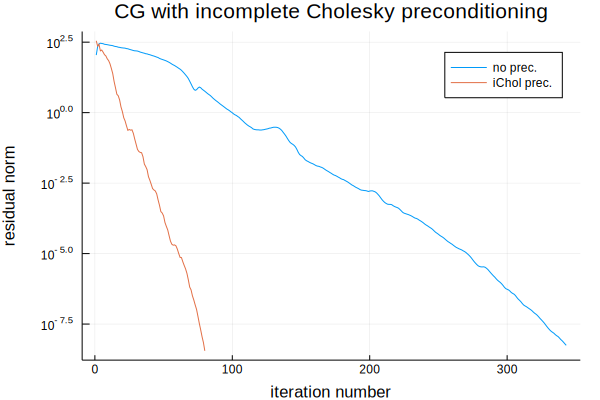

In [6]:
plot(hist1[:resnorm],label="no prec.", 
    xaxis=("iteration number"), yaxis=(:log10,"residual norm"),
    title="CG with incomplete Cholesky preconditioning")
plot!(hist2[:resnorm],label="iChol prec.")

You can see we got a little improvement with this preconditioner. It saved enough iterations to more than make up for the fact that each iteration now involves extra work.